In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [0]:
#resnet101
model = InceptionV3(weights= None, include_top=True, classes=4, input_shape=(224,224,3))

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [9]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 252s 3s/step - loss: 1.1642 - acc: 0.5075 - val_loss: 2.2871 - val_acc: 0.2750
Epoch 2/25
100/100 [==============================] - 48s 480ms/step - loss: 0.8107 - acc: 0.6997 - val_loss: 3.3766 - val_acc: 0.2603
Epoch 3/25
100/100 [==============================] - 20s 200ms/step - loss: 0.6694 - acc: 0.7513 - val_loss: 4.3215 - val_acc: 0.3014
Epoch 4/25
100/100 [==============================] - 20s 201ms/step - loss: 0.6018 - acc: 0.7800 - val_loss: 1.4554 - val_acc: 0.4375
Epoch 5/25
100/100 [==============================] - 19s 191ms/step - loss: 0.5331 - acc: 0.7990 - val_loss: 0.9096 - val_acc: 0.8082
Epoch 6/25
100/100 [==============================] - 20s 196ms/step - loss: 0.5337 - acc: 0.8194 - val_loss: 0.0882 - val_acc: 0.9315
Epoch 7/25
100/100 [==============================] - 20s 205ms/step - loss: 0.5118 - acc: 0.8087 - val_loss: 0.8776 - val_acc: 0.9250
Epoch 8/25
100/100 [==============================] - 20s

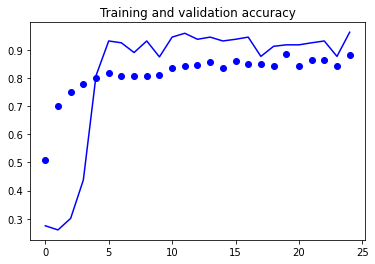

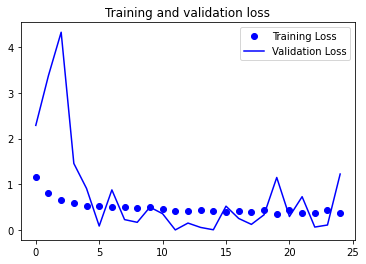

In [10]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

14/14 [==============================] - 32s 2s/step


0.875